In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('pt_core_news_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Dataset
link = 'https://raw.githubusercontent.com/JAugusto97/ToLD-Br/main/ToLD-BR.csv'
df = pd.read_csv(link)

In [19]:
df

,text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20995,@user faz favor vai carai,0.0,0.0,0.0,0.0,0.0,0.0
20996,só queria conhecer alguém que não conhece o he...,1.0,0.0,0.0,0.0,0.0,0.0
20997,"vcs militam na hora errada em cima de memes, p...",0.0,0.0,0.0,0.0,0.0,0.0
20998,@user porra any eu tava c dor de cabeca e fui ...,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Padronização das classes
binary_columns = ['homophobia', 'obscene', 'insult', 'racism', 'misogyny', 'xenophobia']
df[binary_columns] = df[binary_columns].applymap(lambda x: True if x != 0 else False)

C:\Users\pedro\AppData\Local\Temp\ipykernel_4560\631508731.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: True if x != 0 else False)


In [21]:
# Remoção de usernames
df['text'] = df['text'].str.replace(r'@\w+|USER', '', regex=True)
# Remoção de links
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
# Remoção de 'rt' ou 'RT'
df['text'] = df['text'].str.replace(r'\brt\b|\bRT\b', '', regex=True)
# Remoção de hashtags
df['text'] = df['text'].str.replace(r'#\w+', '', regex=True)
# Remoção de quebra de linha
df['text'] = df['text'].str.replace(r'\n', '', regex=True)
# Remoção de palavras contendo dígitos
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', regex=True)
# Remoção de palavras de tamanho 1 e 2
df['text'] = df['text'].str.replace(r'\b\w{1,2}\b', '', regex=True)
# Remoção de pontuações e caracteres especiais
df['text'] = df['text'].str.replace(r'[^\w\s]', ' ', regex=True)
# Remoção de espaços extras
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [22]:
# Normalização de texto
df['text'] = df['text'].str.lower()

In [23]:
# Remoção de stop words
stop_words = set(stopwords.words('portuguese'))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [24]:
# Tokenização
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))

In [25]:
# Lematização
df['tokenized_text'] = df['tokenized_text'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])

In [26]:
df

,text,homophobia,obscene,insult,racism,misogyny,xenophobia,tokenized_text
0,nivel amizade isis ter insta ter penso manda m...,False,False,True,False,False,False,"[nivel, amizade, isi, ter, insta, ter, pensar,..."
1,cara adultera dados desmascarados ainda quer f...,False,False,True,False,False,False,"[cara, adulterar, dado, desmascarar, ainda, qu..."
2,cara simplesmente maior vencedor história fute...,False,True,True,False,False,False,"[carar, simplesmente, grande, vencedor, histór..."
3,chorando vei vsf staneio izone nada,False,True,False,False,False,False,"[chorar, vei, vsf, staneio, izone, nada]"
4,eleitor bolsonaro tão ignorante percebeu frase...,False,True,True,False,False,False,"[eleitor, bolsonaro, tão, ignorante, perceber,..."
...,...,...,...,...,...,...,...,...
20995,faz favor vai carai,False,False,False,False,False,False,"[fazer, favor, ir, carair]"
20996,queria conhecer alguém conhece hetero taubaté ...,True,False,False,False,False,False,"[querer, conhecer, alguém, conhecer, hetero, t..."
20997,vcs militam hora errada cima memes ngm suporta...,False,False,False,False,False,False,"[vcs, militar, hora, errar, cima, meme, ngm, s..."
20998,porra any tava dor cabeca comer,False,False,False,False,False,False,"[porra, any, tar, dor, cabecar, comer]"


<Axes: >

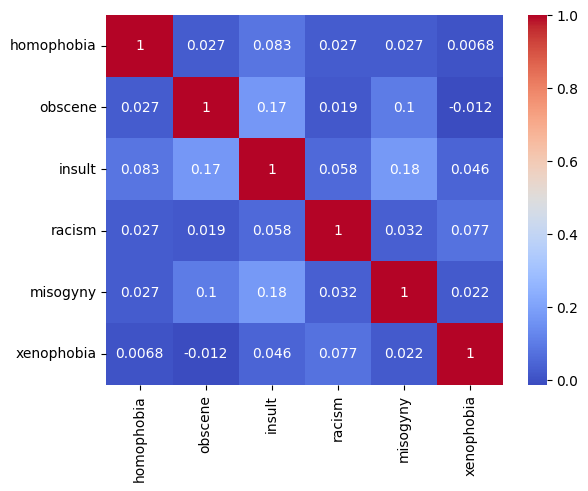

In [27]:
# Matriz correlação entre as classes
corr = df[binary_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [28]:
processed_df = df[['tokenized_text', 'homophobia', 'obscene', 'insult', 'racism', 'misogyny', 'xenophobia']]

In [29]:
processed_df

,tokenized_text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,"[nivel, amizade, isi, ter, insta, ter, pensar,...",False,False,True,False,False,False
1,"[cara, adulterar, dado, desmascarar, ainda, qu...",False,False,True,False,False,False
2,"[carar, simplesmente, grande, vencedor, histór...",False,True,True,False,False,False
3,"[chorar, vei, vsf, staneio, izone, nada]",False,True,False,False,False,False
4,"[eleitor, bolsonaro, tão, ignorante, perceber,...",False,True,True,False,False,False
...,...,...,...,...,...,...,...
20995,"[fazer, favor, ir, carair]",False,False,False,False,False,False
20996,"[querer, conhecer, alguém, conhecer, hetero, t...",True,False,False,False,False,False
20997,"[vcs, militar, hora, errar, cima, meme, ngm, s...",False,False,False,False,False,False
20998,"[porra, any, tar, dor, cabecar, comer]",False,False,False,False,False,False


In [4]:
# Salvar o dataset processado
processed_df.to_csv('./data/processed_toldbr.csv', index=False)